### The Madelon dataset

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Load dataset from csv file
madelon = pd.read_csv("/Users/Administratoor/Documents/Winter/BAX 452 - Machine Learning/Assignment 5/madelon.csv")

In [4]:
# View first few lines of data
madelon.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
0,0,485,477,537,479,452,471,491,476,475,...,477,481,477,485,511,485,481,479,475,496
1,1,483,458,460,487,587,475,526,479,485,...,463,478,487,338,513,486,483,492,510,517
2,2,487,542,499,468,448,471,442,478,480,...,487,481,492,650,506,501,480,489,499,498
3,3,480,491,510,485,495,472,417,474,502,...,491,480,474,572,454,469,475,482,494,461
4,4,484,502,528,489,466,481,402,478,487,...,488,479,452,435,486,508,481,504,495,511


In [6]:
# View dimension of dataset
madelon.shape

(2600, 501)

In [7]:
# Drop the first column
madelon.drop(['Unnamed: 0'],axis=1, inplace=True)

In [8]:
# Check that the column is dropped successfully
madelon.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
0,485,477,537,479,452,471,491,476,475,473,...,477,481,477,485,511,485,481,479,475,496
1,483,458,460,487,587,475,526,479,485,469,...,463,478,487,338,513,486,483,492,510,517
2,487,542,499,468,448,471,442,478,480,477,...,487,481,492,650,506,501,480,489,499,498
3,480,491,510,485,495,472,417,474,502,476,...,491,480,474,572,454,469,475,482,494,461
4,484,502,528,489,466,481,402,478,487,468,...,488,479,452,435,486,508,481,504,495,511


### I. K-means Clustering

### 1. What preprocessing techniques did you apply, if any?

I conducted scaling for k-means by standardizing all data columns. Then the centroids of the clusters are interperted as standard deviations from marginal average.

In [9]:
X = madelon
cols = X.columns

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
# Feature Scaling for K-means
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
0,0.516136,-0.215974,0.713077,-0.488131,-1.183243,-1.211192,0.260055,-0.409390,-0.786691,-0.794660,...,-0.251994,0.544491,-0.390690,-0.099933,0.492812,-0.682645,0.485992,-0.305568,-0.903116,0.208779
1,0.199264,-0.842352,-1.271907,0.406575,2.081658,-0.631114,1.125953,1.746751,-0.131996,-1.342085,...,-0.923340,-0.199167,0.031642,-1.253498,0.550157,-0.656116,0.827177,0.649950,0.042229,1.018908
2,0.833009,1.926899,-0.266525,-1.718352,-1.279981,-1.211192,-0.952203,1.028037,-0.459344,-0.247236,...,0.227538,0.544491,0.242809,1.194884,0.349450,-0.258173,0.315399,0.429446,-0.254880,0.285934
3,-0.276045,0.245568,0.017044,0.182899,-0.143311,-1.066172,-1.570702,-1.846818,0.980984,-0.384092,...,0.419351,0.296605,-0.517390,0.582789,-1.141514,-1.107118,-0.537563,-0.085064,-0.389929,-1.141436
4,0.357700,0.608208,0.481066,0.630252,-0.844661,0.239003,-1.941801,1.028037,-0.001058,-1.478941,...,0.275491,0.048719,-1.446521,-0.492302,-0.223998,-0.072466,0.485992,1.531967,-0.362919,0.787442


In [12]:
# from sklearn.preprocessing import MinMaxScaler
# ms = MinMaxScaler()
# X = ms.fit_transform(X)
# X = pd.DataFrame(X, columns=[cols])
# X.head()

### Try the following k values: 4, 8, 16, 32, 64

In [28]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Perform K-means clustering
from sklearn.cluster import KMeans

In [15]:
# When k = 4...
kmeans4 = KMeans(n_clusters=4, random_state=0)
kmeans4.fit(X)

KMeans(n_clusters=4, random_state=0)

In [16]:
# The lowest SSE value
kmeans4.inertia_

1277829.449796135

In [17]:
# Identify cluster labels
kmeans4.labels_

array([2, 0, 1, ..., 3, 1, 1], dtype=int32)

In [18]:
# Final locations of the centroids
kmeans4.cluster_centers_

array([[ 0.02170617, -0.0893907 , -0.04309232, ..., -0.02246082,
         0.04185633, -0.09212618],
       [ 0.00495544,  0.02169133, -0.05360519, ...,  0.00242142,
         0.05152945, -0.06132479],
       [-0.02125535,  0.1101336 ,  0.01934703, ...,  0.03624813,
        -0.00954708,  0.08258542],
       [-0.00292269, -0.04318273,  0.06265823, ..., -0.01560196,
        -0.0683088 ,  0.05327916]])

In [19]:
# The number of iterations required to converge
kmeans4.n_iter_

27

In [20]:
# When k = 8...
kmeans8 = KMeans(n_clusters=8, random_state=0) 
kmeans8.fit(X)

KMeans(random_state=0)

In [21]:
kmeans8.inertia_

1268382.0487143067

In [22]:
kmeans8.labels_

array([5, 5, 6, ..., 0, 7, 6], dtype=int32)

In [23]:
kmeans8.cluster_centers_

array([[ 0.01137204, -0.07184631,  0.04420262, ..., -0.0759537 ,
        -0.06200636,  0.10478238],
       [-0.02184252,  0.11985291,  0.01257553, ...,  0.07304594,
        -0.0261961 ,  0.14242539],
       [ 0.00872634,  0.0477645 , -0.03720997, ..., -0.02869665,
        -0.0406249 , -0.05916296],
       ...,
       [-0.01985856,  0.06954492,  0.0825186 , ...,  0.07554343,
        -0.05331243,  0.08600496],
       [-0.04687795, -0.00395711, -0.02866124, ..., -0.00593723,
         0.10348339, -0.09167349],
       [ 0.00180992, -0.01841606,  0.08610855, ...,  0.09046199,
        -0.03557565,  0.01733045]])

In [24]:
kmeans8.n_iter_

22

In [25]:
# When k = 16...
kmeans16 = KMeans(n_clusters=16, random_state=0)
kmeans16.fit(X)

KMeans(n_clusters=16, random_state=0)

In [26]:
kmeans16.inertia_

1260483.2210398824

In [27]:
# When k = 32...
kmeans32 = KMeans(n_clusters=32, random_state=0)
kmeans32.fit(X)

KMeans(n_clusters=32, random_state=0)

In [28]:
kmeans32.inertia_

1250937.1099298736

In [29]:
# When k = 64...
kmeans64 = KMeans(n_clusters=64, random_state=0)
kmeans64.fit(X)

KMeans(n_clusters=64, random_state=0)

In [30]:
kmeans64.inertia_

1233582.3162810237

### 2. Describe qualitatively: How does the number of clusters affect the performance of the clustering algorithm on the dataset? 

If the number of clusters k is too small, there will too many data points in each cluster, resulting in decreased accuracy of the clustering; If the number of clusters k is too large, then there will be too few data points in each cluster, resulting in overfitting and not capturing the underlying patterns in the data, so the model may be influenced by noise or outliers.

### 3. Generate a plot of the number of clusters k (x-axis) versus the sum of squared distance (SSE) between data points and their assigned centroids (y-axis). 

In [52]:
# Initiate a list of SSEs
sse = []

# Iterate through the loop for chosen k values
for k in (4, 8, 16, 32, 64):
    
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, random_state = 0)
    kmeans.fit(X)
    
    # Fill in the list of SSEs
    sse.append(kmeans.inertia_)
    
print(sse)

[1277829.449796135, 1268382.0487143067, 1260483.2210398824, 1250937.1099298736, 1233582.3162810237]


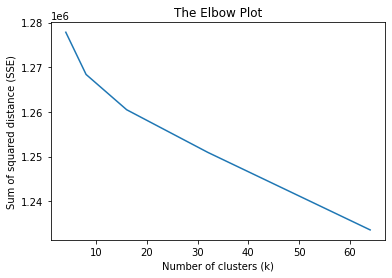

In [53]:
# Draw a plot
import matplotlib.pyplot as plt

plt.plot((4, 8, 16, 32, 64), sse)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distance (SSE)')
plt.show()

This plot shows the relationship between the number of clusters and the total squared distance within each cluster. As the number of clusters increases, the value of SSE decreases. Thus, by finding the "elbow", we find the optimal k among all alternative values.

### What appears to be the optimal k from the list of values you used, and why?

From the above plot, the optimal k appears to be 16. Although when k = 64 the SSE reaches the lowest level among all selected k values, we need to select the value of k at the “elbow”, i.e. the point after which the distortion/inertia start decreasing in a linear fashion. Thus, from the list of values I used, the optimal k is 16. In terms of the comparison between k = 8 and k = 16 (as both seem to be "elbows"), the value of 16 is preferred because there is a significant decrease in SSE from k = 8 to k = 16.

### 4. For k = 8, how did you initialize the set of cluster centroids before running k-means?

In [33]:
# Method of Initialization in the previous question is by default 'k-means++'
kmeans8 = KMeans(n_clusters=8, random_state=0) 

In the previous part, I initialized the set of cluster centroids using ‘k-means++’, which is the default setting in running k-means clustering. This method selects initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia. The algorithm implemented is “greedy k-means++”. 

### Rerun k-means again, this time ensuring that the centroids are all different. Does this – and if so, to what extent – affect the final clusters created?

In [34]:
# Use a different method of initialization which is 'random'
kmeans8 = KMeans(n_clusters = 8, init = 'random', random_state = 0)
kmeans8.fit(X)

KMeans(init='random', random_state=0)

In [35]:
# Get the sum of squared distances within clusters
kmeans8.inertia_

1268084.5597282113

In [36]:
# Get the lables of clusters
kmeans8.labels_

array([6, 4, 5, ..., 3, 1, 5], dtype=int32)

In [37]:
# Get the centroids of clusters
kmeans8.cluster_centers_

array([[-0.01384992,  0.05331876, -0.05552963, ..., -0.04451812,
         0.08531255, -0.06535252],
       [-0.04396904,  0.07322513, -0.02682884, ..., -0.03054157,
        -0.02073073, -0.08997091],
       [ 0.01611755, -0.13451323, -0.08307642, ...,  0.03451652,
         0.05156256, -0.09913385],
       ...,
       [ 0.01133533, -0.07839595,  0.04008876, ..., -0.04513115,
        -0.02254802,  0.07400783],
       [ 0.01507215,  0.06465413,  0.05856969, ...,  0.09054305,
        -0.08177699,  0.10691883],
       [ 0.07463633,  0.06017895, -0.04033868, ..., -0.04754419,
         0.06291007,  0.10612051]])

In [38]:
# Get the number of iterations required to converge
kmeans8.n_iter_

24

The SSE when using the initialization method of 'random' is 1268084.559, while the SSE when using 'k-means++' is 1268382.048. In both scenarios the number of clusters is 8, and the resulting SSEs do not vary much. While 'k-means++' method is designed to speed up convergence, the 'random' method chooses n_clusters observations (rows) at random from data for the initial centroids. In terms of SSE, ensuring that the centroids are all different results in a lower sum of squared distances, but it does not affect the final clusters created to a large extent. 

### 5. More generally for any dataset, what evaluation metrics can be used to assess the quality of the clusters produced?

Since we don't have the outcome y in clustering (unsupervised learning), evaluating the performance of a clustering algorithm is not as trivial as counting the number of errors or calculating the accuracy rate like in the case of supervised learning algorithms. There are two common evaluation methods to assess the quality of clusters produced: Silhouette coefficient and Dunn’s Index.

1) Silhouette coefficient: 

Silhouette Score = (b-a)/max(a,b). It is composed of two scores:

a: The mean distance between a sample and all other points in the same cluster.
b: The mean distance between a sample and all other points in the next nearest cluster.

The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters. 

2) Dunn’s Index

Dunn’s Index is equal to the minimum inter-cluster distance divided by the maximum cluster size. Note that large inter-cluster distances (better separation) and smaller cluster sizes (more compact clusters) lead to a higher DI value. A higher DI implies better clustering. It assumes that better clustering means that clusters are compact and well-separated from other clusters.

### II. PCA: Principal Component Analysis

### 1. Fit the standardized data with PCA. 

In [39]:
# View standardized data in the last question
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
0,0.516136,-0.215974,0.713077,-0.488131,-1.183243,-1.211192,0.260055,-0.409390,-0.786691,-0.794660,...,-0.251994,0.544491,-0.390690,-0.099933,0.492812,-0.682645,0.485992,-0.305568,-0.903116,0.208779
1,0.199264,-0.842352,-1.271907,0.406575,2.081658,-0.631114,1.125953,1.746751,-0.131996,-1.342085,...,-0.923340,-0.199167,0.031642,-1.253498,0.550157,-0.656116,0.827177,0.649950,0.042229,1.018908
2,0.833009,1.926899,-0.266525,-1.718352,-1.279981,-1.211192,-0.952203,1.028037,-0.459344,-0.247236,...,0.227538,0.544491,0.242809,1.194884,0.349450,-0.258173,0.315399,0.429446,-0.254880,0.285934
3,-0.276045,0.245568,0.017044,0.182899,-0.143311,-1.066172,-1.570702,-1.846818,0.980984,-0.384092,...,0.419351,0.296605,-0.517390,0.582789,-1.141514,-1.107118,-0.537563,-0.085064,-0.389929,-1.141436
4,0.357700,0.608208,0.481066,0.630252,-0.844661,0.239003,-1.941801,1.028037,-0.001058,-1.478941,...,0.275491,0.048719,-1.446521,-0.492302,-0.223998,-0.072466,0.485992,1.531967,-0.362919,0.787442


### Create a cumulative variance plot – showing the number of components included (x-axis) versus the amount of variance captured (y-axis).

In [40]:
import matplotlib.pyplot as plt

In [41]:
from sklearn.decomposition import PCA

In [42]:
# create a PCA object without specifying the no. of components
pca = PCA()

# fit the PCA model to scaled data
X_pca = pca.fit_transform(X)

# calculate the explained variance
explained_var = pca.explained_variance_

# calculate the cumulative explained variance
cum_sum_eigenvalues = np.cumsum(explained_var)

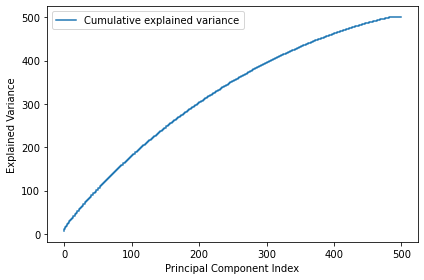

In [43]:
# plt.bar(range(0,len(explained_var)), explained_var, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained Variance')
plt.xlabel('Principal Component Index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

The cumulative variance plot shows the amount of variance captured with regard to the number of principal components used. It is obvious that as the number in x-axis increases, the value in y-axis also increases (but at a slower increasing rate). When all 500 components (corresponding to 500 features in the original dataset) are included in PCA analysis, the cumulative explained vairance increases to its maximum amount. 

### Generally, we want to retain at least 75% of the variance. How many components would you decide to keep?

In [44]:
# Since we have already computed the eigenvalues as explained_var in the previous question...

# calculate the total variance
total_variance = sum(explained_var)

# calculate the fraction of variance captured by the current component
variance_explained = [(i / total_variance) for i in sorted(explained_var, reverse=True)]

# calculate the cumulative variance
cumulative_variance = np.cumsum(variance_explained)

# initialize the number of components
n_components = 0

# loop over the cumulative variance
for i in range(len(cumulative_variance)):
    
    # check if we've captured at least 75% of the variance
    if cumulative_variance[i] >= 0.75:
        
        # increment the number of components
        n_components = i + 1
        
        # if we have, break out of the loop
        break

print("Number of components capturing at least 75% of the variance should be: ", n_components)

Number of components capturing at least 75% of the variance should be:  277


In [45]:
# We can double-check this result with the cumulative variance ratio plot below:

# Plot with the percentage of variance captured as y-axis
pca = PCA()
X_pca = pca.fit_transform(X)
explained_var_ratio = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(explained_var_ratio)

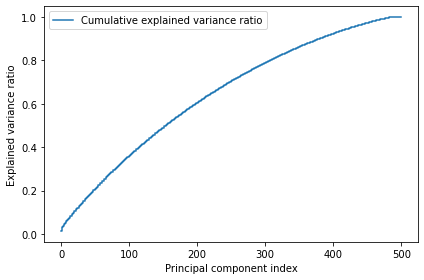

In [46]:
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance ratio')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

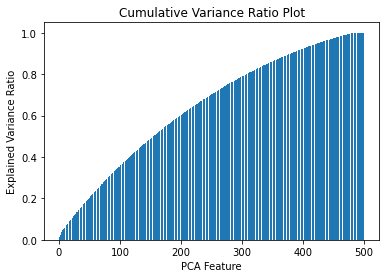

In [47]:
# Similarly, a bar plot with the percentage of variance captured as y-axis
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    cum_sum_eigenvalues
    )

plt.xlabel('PCA Feature')
plt.ylabel('Explained Variance Ratio')
plt.title('Cumulative Variance Ratio Plot')
plt.show()

### 2. Perform PCA with your selected principal components.

### 2.1 Plot the transformed data on a graph with the first two principal components as the axes i.e. x = PC 1, y = PC 2.

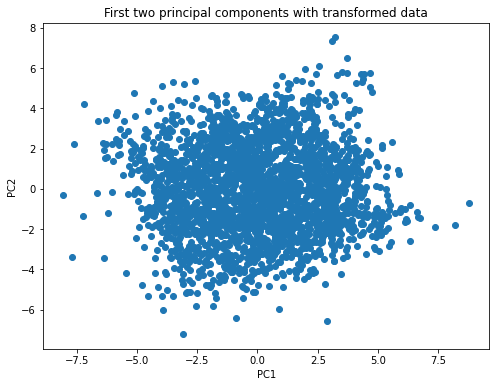

In [29]:
pca = PCA(n_components = 277)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6)) ## set the figure size to be larger

plot = plt.scatter(X_pca[:,0], X_pca[:,1]) ## draw a scatterplot with the first two PCs as x-axis and y-axis

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components with transformed data")
plt.show()

In [49]:
# Show first two principal components with scaler:

# from sklearn.pipeline import Pipeline
# pca = PCA()
# pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
# Xt = pipe.fit_transform(madelon)
# plot = plt.scatter(Xt[:,0], Xt[:,1])
# Same plot as above.

### 2.2 Plot the original data on a graph with the two original variables that have the highest absolute combined loading for PC 1 and PC 2

In [30]:
# Perform PCA transformation
pca1 = PCA(n_components= 277)
pca1.fit_transform(X)

# Get the loadings of the scaled variables on the first two principal components
loadings = pca1.components_[:2, :].T

In [37]:
# pac1.components_ returns an array of shape (n_components, n_features)

In [31]:
# Demonstrate the loadings for each PC without weighing variance for each PC
pd.DataFrame(loadings, columns=['PC1', 'PC2'])

,PC1,PC2
0,0.000280,0.001076
1,-0.021321,-0.008900
2,-0.003638,0.001355
3,-0.000347,0.004603
4,0.004230,-0.002035
...,...,...
495,0.007322,-0.005048
496,-0.008547,0.026460
497,-0.008046,0.020242
498,-0.007595,-0.012539


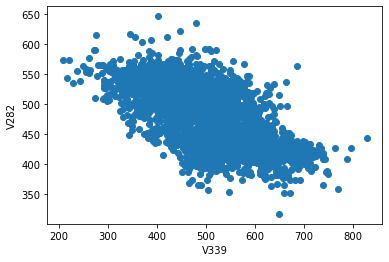

In [32]:
# find the variables with the highest absolute combined loading for PC1 and PC2
highest_loadings = np.abs(loadings).sum(axis=1).argsort()[-2:]
x_var = highest_loadings[-1]
y_var = highest_loadings[-2]

# plot the original data based on the highest loading variables for PC1 and PC2
plt.scatter(madelon.iloc[:, x_var], madelon.iloc[:, y_var])
plt.xlabel(madelon.columns[x_var])
plt.ylabel(madelon.columns[y_var])
plt.show()

In [34]:
# Alternatively, calculate the loadings multiplied by the square root of the corresponding eigenvalue,
# i.e. loadings with weighing variance for each PC
loadings1 = pca1.components_.T * np.sqrt(pca1.explained_variance_)
pd.DataFrame(loadings1[:, :2], columns=['PC1', 'PC2'])

,PC1,PC2
0,0.000711,0.002404
1,-0.054178,-0.019881
2,-0.009245,0.003027
3,-0.000882,0.010281
4,0.010750,-0.004546
...,...,...
495,0.018606,-0.011276
496,-0.021718,0.059104
497,-0.020445,0.045215
498,-0.019299,-0.028008


In [35]:
# find the variables with the highest absolute combined loading for PC1 and PC2
highest_loadings = np.abs(loadings1).sum(axis=1).argsort()[-2:]
x_var = highest_loadings[-1]
y_var = highest_loadings[-2]

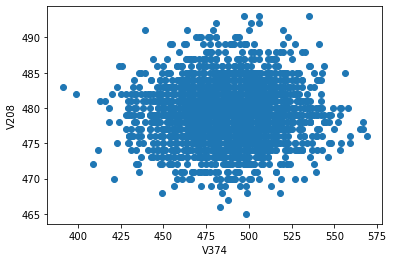

In [36]:
# plot the original data based on the highest loading variables for PC1 and PC2
plt.scatter(madelon.iloc[:, x_var], madelon.iloc[:, y_var])
plt.xlabel(madelon.columns[x_var])
plt.ylabel(madelon.columns[y_var])
plt.show()

### 3. Examine the scatter plot of PC 1 (x-axis) versus PC 2 (y-axis) for all data points that you created in the previous part. 

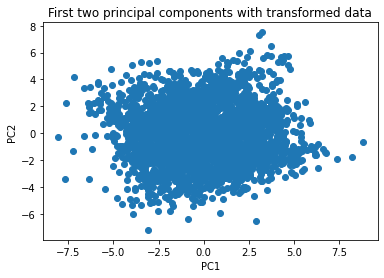

In [38]:
# pca = PCA(n_components = 277)
# X_pca = pca.fit_transform(X)

plot = plt.scatter(X_pca[:,0], X_pca[:,1]) ## draw a scatterplot with the first two PCs as x-axis and y-axis

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components with transformed data")
plt.show()

### Qualitatively, can you identify visible clusters? Why or why not might this be the case with this particular dataset?

We cannot identify any visible clusters in this scatterplot, as all the data points are gathered together and there is no separate groups of data in the graph. This is the case with this particular dataset, because it is high-dimensional with 500 features in toal. Only selecting the first two principal components is not enough in explaining most of the variance in the dataset. Thus, the scatterplot of PC1 vs. PC2 for all data points is not comprehensive enough to identify visible clusters qualitatively. 

### III. K-means Clustering on the transformed data from the previous problem

### 1. Why is it a good idea to do this, especially for high-dimensional datasets? Name a number of reasons.

For high-dimensional datasets, performing k-means clustering on PCA transformed data can help to reduce dimension of the original dataset and improve the clustering performance. Since there are many features(dimensions) in the dataset, the method of k-means clustering alone cannot find meaningful clusters that will help us group new observations. PCA can help to address these issues by reducing the dimensionality of the data while retaining the most important information via the selction of several principal components. By transforming the high-dimensional data into a lower-dimensional space, we can reduce the sparsity of the data and improve the clustering performance. Based on transformed data, k-means clustering can then perform well in identifying groups of data points that are close to each other in distance.

Also, while PCA is good at plotting data and not good at interpreting them, performing k-means clustering on PCA-transformed data can help to better expain clustered data points. We first use PCA to visualize high-dimensional data in a lower-dimensional space, such as a 2D or 3D plot, and then use k-means to gain insights into the underlying structure of the data and potentially identify clusters or patterns. 

In addition, in terms of data compression (e.g. compressing pictures), PCA can be used for storing or transmitting the data in a lower dimension, while k-means clustering is then used to classify various pictures into different groups effectively. Without transforming data with PCA, simply performing k-means clustering is hard to achieve the goal in a reasonable manner.

### 2. Use the same k values again (4, 8, 16, 32, 64) to again generate an elbow plot.

In [41]:
# pca = PCA(n_components = 277)
# X_pca = pca.fit_transform(X)

In [42]:
# After performing PCA, we get the transformed data with the first two PCs
# Recall that we use (X_pca[:,0], X_pca[:,1]) to capture PC1 and PC2 in the scatterplot

# Demonstrate the transformed data with 2,600 rows in total
pd.DataFrame(X_pca[:,:2], columns=['PC1', 'PC2'])

,PC1,PC2
0,-4.962087,-0.581859
1,-0.460788,2.866281
2,1.127658,-2.238416
3,2.893059,-1.863277
4,-0.667076,1.914422
...,...,...
2595,1.648350,0.266989
2596,-1.076429,-1.356932
2597,2.740297,1.758305
2598,1.319572,-2.665562


In [45]:
# Initiate a list of SSEs
SSE_pca = []

# Iterate through the loop for chosen k values
for k in (4, 8, 16, 32, 64):
    
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, random_state = 0)
    kmeans.fit(X_pca[:,:2])
    
    # Fill in the list of SSEs
    SSE_pca.append(kmeans.inertia_)
    
print(SSE_pca)

[9421.613549446423, 4968.87526299105, 2568.442211936893, 1350.4976695315793, 669.7914668168678]


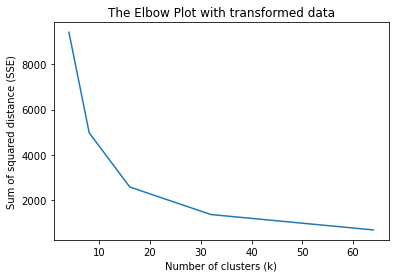

In [46]:
# The Elbow Plot generated after performing PCA
import matplotlib.pyplot as plt

plt.plot((4, 8, 16, 32, 64), SSE_pca)
plt.title('The Elbow Plot with transformed data')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distance (SSE)')
plt.show()

### What is the optimal k? Is it different from the one you found in (1)?

After running k-means clustering on the transformed data, the optimal k is now 32. It is different from the one we found in Part I, which is k = 16. As is shown in the plot, k = 32 is the optimal "elbow" which yields a much lower sum squared of distances than previous k values, while adding more clusters after k = 32 (i.e. going towards k = 64) does not give a much better modeling of the data.

### Compare the SSE values plotted in this exercise to the previous plot you generated in (1c) before performing PCA.

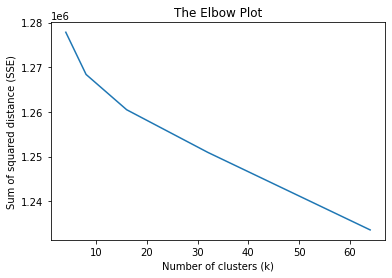

In [53]:
# Recall the Elbow plot generated before performing PCA
plt.plot((4, 8, 16, 32, 64), sse)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distance (SSE)')
plt.show()

In [73]:
print(sse)

[1277829.449796135, 1268382.0487143067, 1260483.2210398824, 1250937.1099298736, 1233582.3162810237]


In [47]:
print(SSE_pca)

[9421.613549446423, 4968.87526299105, 2568.442211936893, 1350.4976695315793, 669.7914668168678]


The two plots (before vs. after performing PCA) are different from each other, and the values of SSE (in y-axis) are also significantly different.

### 3. Again, create a scatter plot of PC 1 (x-axis) versus PC 2 (y-axis) for all of the transformed data points.

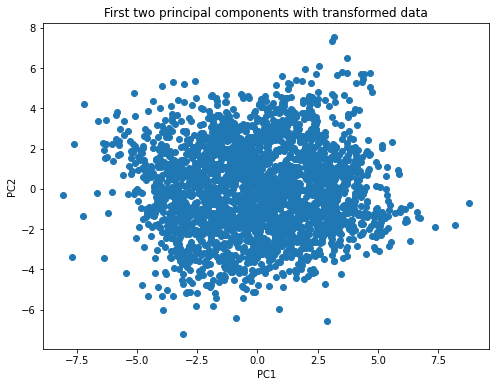

In [48]:
# pca = PCA(n_components = 277)
# X_pca = pca.fit_transform(X)

plot = plt.scatter(X_pca[:,0], X_pca[:,1]) ## draw a scatterplot with the first two PCs as x-axis and y-axis

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components with transformed data")
plt.show()

### Label the cluster centers and color-code by cluster assignment for the first 5 iterations of k = 32. Can you see the algorithm begin to converge to optimal assignments?

In [176]:
# pca1 = PCA(n_components=X.shape[1])
# X_pca1 = pca1.fit_transform(X)

In [48]:
pca = PCA(n_components = 277)
X_pca = pca.fit_transform(X)

In [49]:
X_pca.shape

(2600, 277)

In [51]:
# For k = 32 on transformed data with PCA
# kmeans32_pca = KMeans(n_clusters = 32, max_iter=5, random_state = 0)

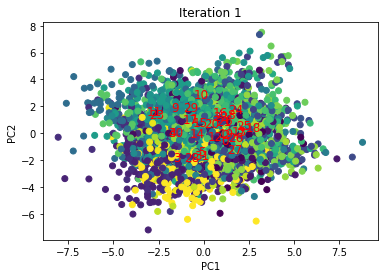

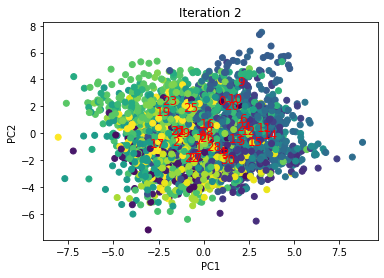

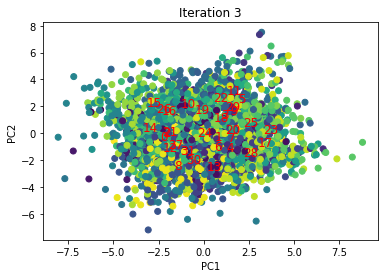

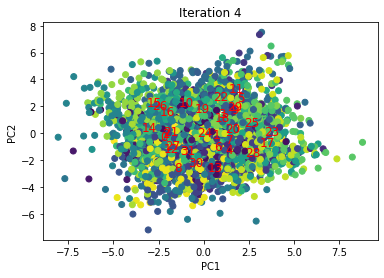

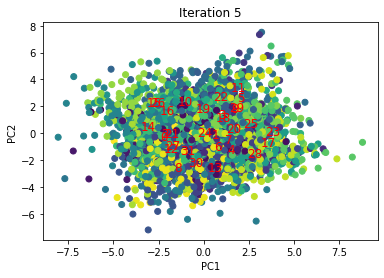

In [50]:
# Run the KMeans algorithm for 5 iterations
for i in range(5):
    
    # Fit the KMeans model to the data
    kmeans32_pca = KMeans(n_clusters = 32, max_iter = i+1, random_state = 0)
    kmeans32_pca.fit(X_pca)
    
    # Get the labels for each data point
    labels = kmeans32_pca.labels_
    
    # Add cluster centers to the plot
    centers = kmeans32_pca.cluster_centers_
    
    # Plot the data points color-coded by cluster assignment
    plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
    
    # Label the cluster centers with numbers
    for j, center in enumerate(centers):
        plt.text(center[0], center[1], str(j), fontsize=12, color='red')
    
    # Draw the scatterplots for the first 5 iterations
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title('Iteration {}'.format(i+1))
    plt.show()